# Lab 4

# import libs and connect to database

In [16]:
import pandas
import configparser
import psycopg2

In [17]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [18]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db
                        )

In [20]:
cur = conn.cursor()

## q1

In [21]:
sql_q1 = """
        select * from gp19.student
            """

In [22]:
df = pandas.read_sql_query(sql_q1,conn)

df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,shawwc@dukes.jmu.edu,will shaw,IA
2,mckeowdj@dukes.jmu.edu,declan mckeown,IA
3,saclolcr@dukes.jmu.edu,christopher saclolo,IA
4,menjivax@dukes.jmu.edu,adriana mejivar,IA
5,juarezkx@dukes.jmu.edu,karina juarez,IA
6,s2@dukes.jmu.edu,s2,IA


## q2

In [23]:
sql_q2 = """
        select gp19.professor.p_name,
        gp19.course.c_name
        from gp19.professor
        inner join gp19.course
        on gp19.professor.p_email = gp19.course.p_email
        
        """

In [24]:
df = pandas.read_sql_query(sql_q2,conn)

df[:]

,p_name,c_name
0,matthew lovesky,personal wellness
1,noel hendrickson,counterfactual reasoning
2,micahel schoenbeck,leading small organizations
3,squilliam fancyson,bikini bottom
4,new_p,new_name
5,new_p,data mining
6,will davis,new_c_name1


## q3

In [25]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp19.enroll_list
        group by c_number
        order by enrolled desc
        """

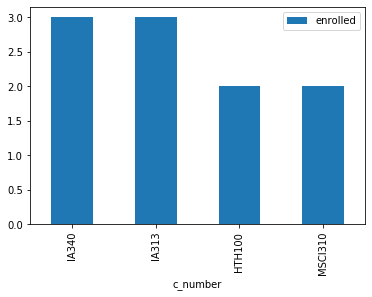

In [26]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## q4

In [27]:
sql_q4 = """
        select gp19.professor.p_name,
        count(gp19.course.c_name) as teaching_number
        from gp19.professor
        inner join gp19.course
        on gp19.professor.p_email = gp19.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

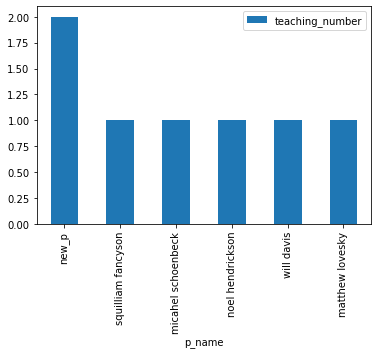

In [28]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## q5

In [47]:
sql_q5_professor = """
                    insert into gp19.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('schaeferm@jmu.edu','maddy schaefer','ISAT112')

In [48]:
cur.execute(sql_q5_professor)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [31]:
conn.commit()

In [32]:
df=pandas.read_sql_query('select * from gp19.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,noel hendrickson,None
1,schoe2mt@jmu.edu,micahel schoenbeck,None
2,loveskms@jmu.edu,matthew lovesky,hbs3064
3,fancysons@jmu.edu,squilliam fancyson,big nose
4,new_p@jmu.edu,new_p,new_office
5,smithj@jmu.edu,john smith,ISAT123
6,davisw@jmu.edu,will davis,ISAT111
7,schaeferm@jmu.edu,maddy schaefer,ISAT112


In [33]:
sql_q5_course = """
                    insert into gp19.course(c_number,c_name,room,p_email)
                    values('{}','{}','{}','{}')
                    """.format('BIO101','biology','online','schaeferm@jmu.edu')

In [34]:
cur.execute(sql_q5_course)

In [35]:
conn.commit()

In [36]:
df=pandas.read_sql_query('select * from gp19.course',conn)
df[:]

,c_number,c_name,room,p_email
0,HTH100,personal wellness,online,loveskms@jmu.edu
1,IA313,counterfactual reasoning,online,hendrinx@jmu.edu
2,MSCI310,leading small organizations,online,schoe2mt@jmu.edu
3,BB100,bikini bottom,online,fancysons@jmu.edu
4,ia_new,new_name,online,new_p@jmu.edu
5,IA340,data mining,online,new_p@jmu.edu
6,ia_new3,new_c_name1,online,davisw@jmu.edu
7,BIO101,biology,online,schaeferm@jmu.edu


## q6

In [51]:
sql_q6_course = """
                update gp19.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('schaeferm@jmu.edu','new_p@jmu.edu')

In [52]:
cur.execute(sql_q6_course)

In [53]:
conn.commit()

In [54]:
df=pandas.read_sql_query('select * from gp19.course',conn)
df[:]

,c_number,c_name,room,p_email
0,HTH100,personal wellness,online,loveskms@jmu.edu
1,IA313,counterfactual reasoning,online,hendrinx@jmu.edu
2,MSCI310,leading small organizations,online,schoe2mt@jmu.edu
3,BB100,bikini bottom,online,fancysons@jmu.edu
4,ia_new3,new_c_name1,online,davisw@jmu.edu
5,BIO101,biology,online,schaeferm@jmu.edu
6,ia_new,new_name,online,schaeferm@jmu.edu
7,IA340,data mining,online,schaeferm@jmu.edu


In [55]:
sql_q6_professor = """
                delete from gp19.professor
                where p_email = '{}'
                """.format('new_p@jmu.edu')

In [57]:
cur.execute(sql_q6_professor)

In [58]:
df=pandas.read_sql_query('select * from gp19.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,noel hendrickson,None
1,schoe2mt@jmu.edu,micahel schoenbeck,None
2,loveskms@jmu.edu,matthew lovesky,hbs3064
3,fancysons@jmu.edu,squilliam fancyson,big nose
4,smithj@jmu.edu,john smith,ISAT123
5,davisw@jmu.edu,will davis,ISAT111
6,schaeferm@jmu.edu,maddy schaefer,ISAT112


## close connection

In [59]:
cur.close()
conn.close()